3. For an online retailer, predict which product a particular customer is most likely to buy using the given dataset.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv('retail_logistic.csv')
df.columns = df.columns.str.strip()

In [27]:
df = pd.get_dummies(df, columns=['Purchasing behaviour', 'Gender'])


In [28]:
X = df.drop(columns=["Purchasing behaviour_Buy now", "Purchasing behaviour_Don't buy anything"])
y = df["Purchasing behaviour_Buy now"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00         4
        True       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



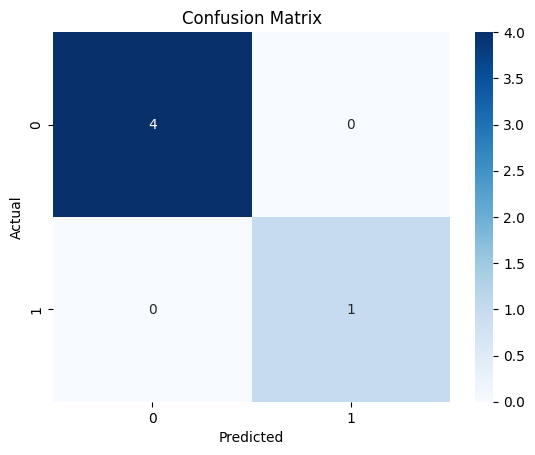

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()